We currently have three resources related to gravity data:

API Gravity Shapefile: Point attribute data representing specific locations with gravity-related properties.

Geophysical Survey Datasets - Gravity Shapefile: Polygonal (area-based) survey data representing regions covered by gravity investigations.

Gravity Anomaly Image (.tif): Raster data displaying gravity anomalies, typically used for visualizing variations in the Earth's gravitational field.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import os

In [5]:
api_gravity_fp = "../data/raw/Dataset/GA/Gravity/API Gravity.shp"  
gdf_api_gravity = gpd.read_file(api_gravity_fp)
gdf_api_gravity.head()

,ENO,BOREHOLE_N,BOREHOLE_T,BOREHOLE_P,COLLAR_LON,COLLAR_LAT,RIG_RELEAS,COUNTRY,ONSHORE_OF,STATE,...,SAMPLE_R_1,SAMPLE_R_2,SAMPLE_R_3,ANALYSIS_1,ANALYSIS_2,SATS_D2H_P,SATS_D2H_S,AROMS_D2H_,AROMS_D2_1,geometry
0,15452,Skua 3,Petroleum,appraisal,124.415930,-12.504734,1988-01-20,AUS,offshore,Ashmore and Cartier Islands,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,POINT (124.41593 -12.50473)
1,15579,Spar 1,Petroleum,exploration,114.886387,-20.613064,1976-09-30,AUS,offshore,Western Australia,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,POINT (114.88639 -20.61306)
2,15261,Saffron 1,Petroleum,exploration,116.362081,-19.943874,1994-10-08,AUS,offshore,Western Australia,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,POINT (116.36208 -19.94387)
3,15453,Skua 4,Petroleum,appraisal,124.427242,-12.491783,1988-08-23,AUS,offshore,Ashmore and Cartier Islands,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,POINT (124.42724 -12.49178)
4,512558,Octans 1,Petroleum,exploration,124.403333,-13.005001,2009-07-06,AUS,offshore,Ashmore and Cartier Islands,...,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,POINT (124.40333 -13.005)


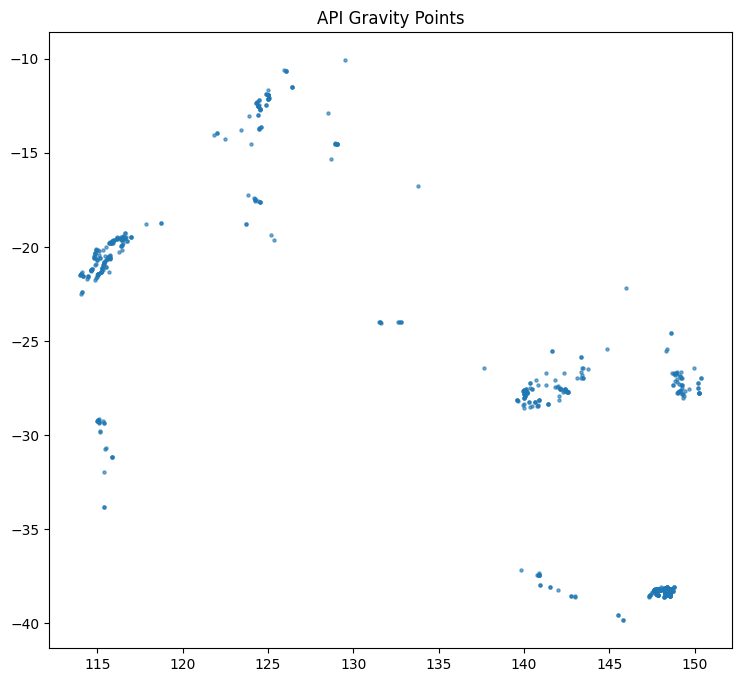

In [9]:
gdf_api_gravity.plot(figsize=(10, 8), markersize=5, alpha=0.6)
plt.title("API Gravity Points")
plt.show()

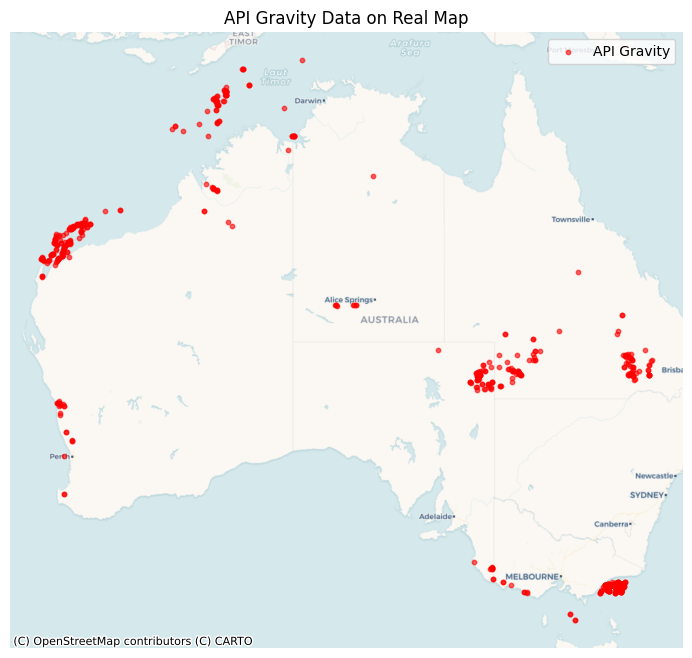

In [14]:
import contextily as ctx

gdf_web = gdf_api_gravity.to_crs(epsg=3857)

# 绘图
fig, ax = plt.subplots(figsize=(12, 8))
gdf_web.plot(ax=ax, color="red", alpha=0.6, markersize=10, label="API Gravity")

# 添加底图
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)  # 你也可以试试 Terrain、OpenStreetMap 等

# 样式美化
ax.set_title("API Gravity Data on Real Map")
ax.set_axis_off()
plt.legend()
plt.show()

In [7]:
gdf_api_gravity.columns
gdf_api_gravity.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 668 entries, 0 to 667
Columns: 194 entries, ENO to geometry
dtypes: float64(93), geometry(1), int32(5), object(95)
memory usage: 999.5+ KB


In [15]:
survey_gravity_fp = "../data/raw/Dataset/GA/Gravity/Geophysical Survey Datasets - Gravity.shp"
gdf_survey_gravity = gpd.read_file(survey_gravity_fp)

C:\Users\John\AppData\Local\Temp\ipykernel_33680\2782802680.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


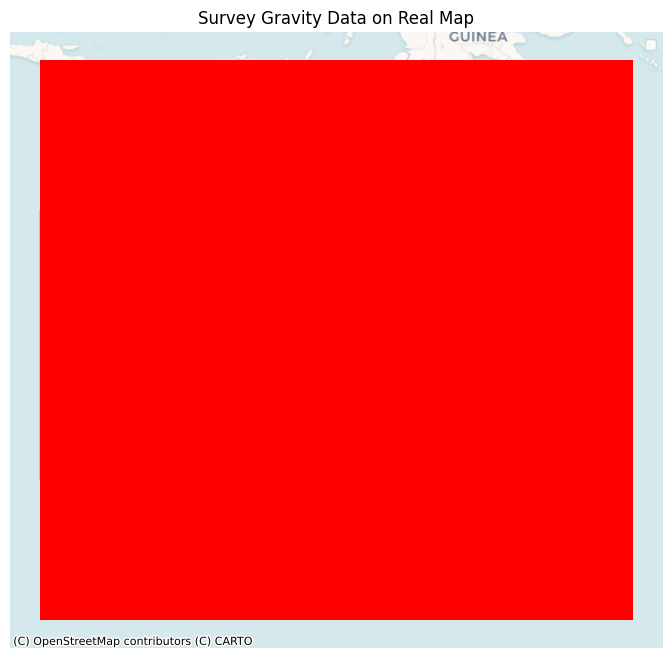

In [18]:
gdf_web = gdf_survey_gravity.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 8))
gdf_web.plot(ax=ax, color="red", alpha=0.6, markersize=10, label="API Gravity")

# 添加底图
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)  # 你也可以试试 Terrain、OpenStreetMap 等

# 样式美化
ax.set_title("Survey Gravity Data on Real Map")
ax.set_axis_off()
plt.legend()
plt.show()

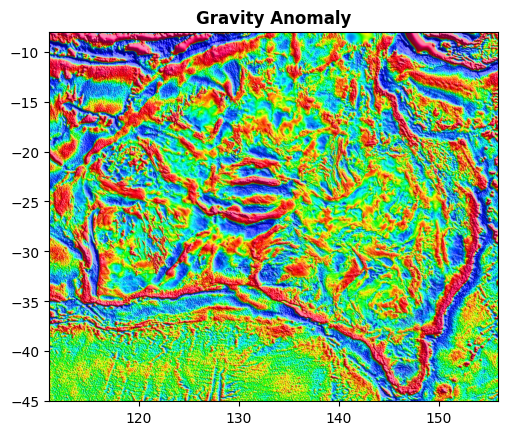

CRS: GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Bands: 3
Shape: 5114 x 4205


In [19]:
tif_fp = "../data/raw/Dataset/GA/Gravity/Gravity Anomaly Image.tif"
with rasterio.open(tif_fp) as src:
    show(src, title="Gravity Anomaly")
    print(f"CRS: {src.crs}")
    print(f"Bands: {src.count}")
    print(f"Shape: {src.width} x {src.height}")